In [1]:
import math
import folium as fl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import collections

In [2]:
attractions = {

    # Locations to choose from:
    'Senso-ji Temple': (35.7146, 139.7967),
    'Meiji Shrine': (35.6764, 139.6993),
    'Harajuku': (35.6719, 139.7028),
    'Akihabara': (35.6989, 139.7740),
    'Asakusa': (35.7119, 139.7936),
    # 'National Museum of Nature and Science': (35.7156, 139.7749),
    # 'Tokyo National Museum': (35.7198, 139.7765),

    # Will go:
    'Zōjō-ji Temple' : (35.65759227877642, 139.74823911747),
    'Shibuya Crossing': (35.6596, 139.7003),
    'Tsukiji Fish Market': (35.6655, 139.7707),
    'The Imperial Palace': (35.6845, 139.7520),
    'Tokyo Tower': (35.6586, 139.7454),
    'Tokyo Skytree': (35.7101, 139.8107),
    'Roppongi Hills': (35.6607, 139.7292),
    
    ###Too far away
    # 'Odaiba': (35.6190, 139.7795),
    # 'Tokyo Disney Resort': (35.6329, 139.8804),

    #### Next time, when cherry blossoms are in full bloom
    # 'Shinjuku Gyoen National Garden': (35.6852, 139.7100),
    # 'Tokyo Meto. Gov. Building': (35.6896, 139.6991),
    # 'Ueno Park': (35.7147, 139.7734),
    # 'Yoyogi Park': (35.6712, 139.6948),


    ### Location of stay
    'Ginza': (35.6707, 139.7632)
}


### Visualizing locations [attractions] as clusters

In [3]:
# Create k-means model with 'n_clusters' clusters,
# Fit model to data, organize the labels in a list
kmeans = KMeans(n_clusters=6) 
gps_cords = np.array(list(attractions.values()))
kmeans.fit(gps_cords)

KMeans(n_clusters=6)

In [4]:
daily_planner = {} 
list_locations = list(attractions.keys())

i=0
for lbl in kmeans.labels_:
  if lbl not in daily_planner.keys():
    daily_planner[lbl] = []
  daily_planner[lbl].append(list_locations[i])
  i+=1

collections.OrderedDict(sorted(daily_planner.items()))

OrderedDict([(0, ['Meiji Shrine', 'Harajuku', 'Shibuya Crossing']),
             (1, ['Tsukiji Fish Market', 'Ginza']),
             (2, ['Senso-ji Temple', 'Asakusa', 'Tokyo Skytree']),
             (3, ['Zōjō-ji Temple', 'Tokyo Tower', 'Roppongi Hills']),
             (4, ['The Imperial Palace']),
             (5, ['Akihabara'])])

Visualizing the geographical proximities:


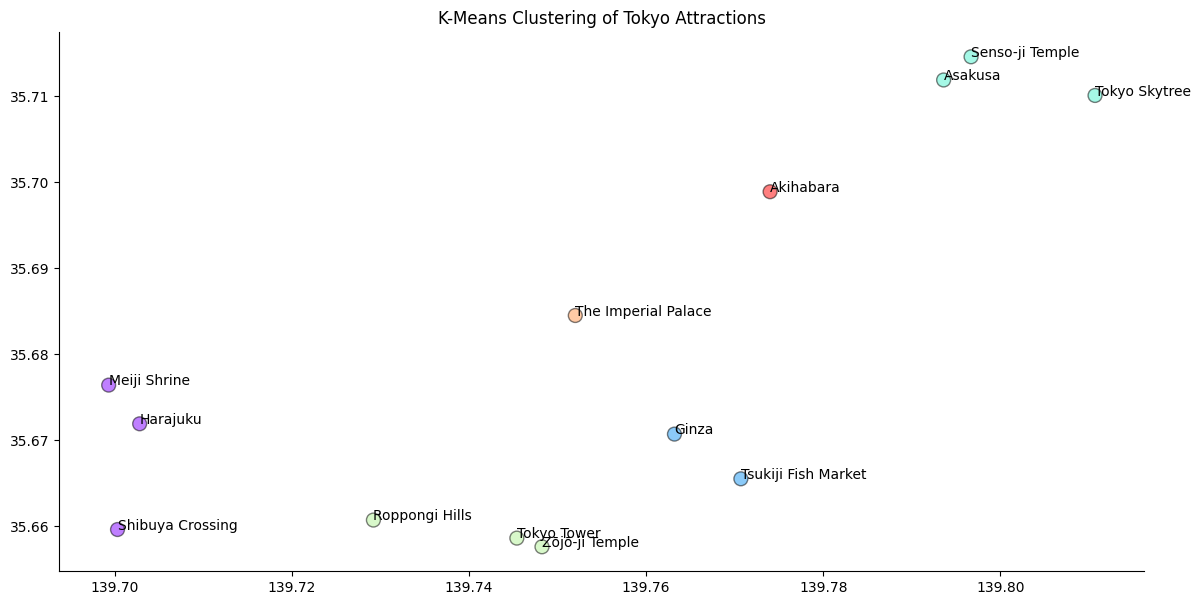

In [5]:
# plot the clusters
fig=plt.figure(figsize=(14,7))
plt.scatter(gps_cords[:, 1], gps_cords[:, 0], c=kmeans.labels_, cmap='rainbow', alpha=0.5, edgecolors='k', s=100)
plt.title('K-Means Clustering of Tokyo Attractions', fontsize=12)

print("Visualizing the geographical proximities:")

# Add in annotations for each location
for i, txt in enumerate(list_locations):
    plt.annotate(txt, (gps_cords[i, 1], gps_cords[i, 0]), rotation=0)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 

plt.show()

### Folium map

Deprecated. Using a scatter plot of (lat,long) is much simplier!

In [6]:
# # Plot attractions on map
# map_center = (35.6762, 139.6503)
# map_zoom = 11
# map_osm = fl.Map(location=map_center, zoom_start=map_zoom)

# for name, coord in attractions.items():
#     fl.Marker(coord, popup=name).add_to(map_osm)

# # Plot restaurants on map
# for name, coord in restaurants.items():
#     fl.Marker(coord, popup=name, icon=fl.Icon(color='red')).add_to(map_osm)

# # Set gray scale theme
# fl.TileLayer('cartodbpositron').add_to(map_osm)

# map_osm

### Restaurant finder

In [7]:
def calc_gcd(lat1, lon1, lat2, lon2, earth_radius=6373.0):
    ''' (float, float, float, float, float) -> float
    Calculate the Great Circle Distance between two points
    '''
    lat1, lon1 = math.radians(lat1), math.radians(lon1)
    lat2, lon2 = math.radians(lat2), math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = c * earth_radius

    return distance


Ranking of restaurants based on distance from attractions


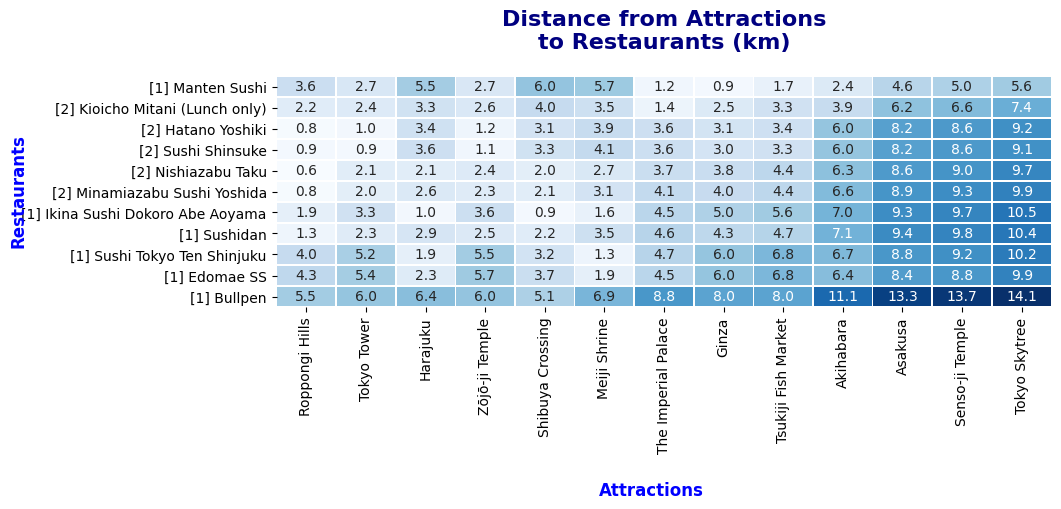

In [8]:
restaurants = {

    # https://www.timeout.com/tokyo/restaurants/best-omakase-sushi-under-5-000-in-tokyo
    '[1] Manten Sushi' : (35.678908711812134, 139.7627264377895),
    '[1] Bullpen' : (35.61431037839728, 139.70787262515262),
    '[1] Edomae SS' : (35.692874860501625, 139.70304664001205),
    '[1] Sushi Tokyo Ten Shinjuku' : (35.688466786570544, 139.70052746544982),
    '[1] Ikina Sushi Dokoro Abe Aoyama' : (35.66393733522458, 139.70894374027736),
    '[1] Sushidan' : (35.650751106570226, 139.7218532789183),

    # https://www.reddit.com/r/Tokyo/comments/vq7zup/sushi_omakase_recommendations_that_arent_near/
    '[2] Nishiazabu Taku' : (35.661317144438264, 139.72231638471305),
    '[2] Hatano Yoshiki' : (35.655650894408915, 139.73471587241167),
    '[2] Minamiazabu Sushi Yoshida' : (35.65584448630569, 139.72325137617995),
    '[2] Sushi Shinsuke' : (35.654805606070205, 139.7361743432963),
    '[2] Kioicho Mitani (Lunch only)' : (35.6792287064762, 139.73797763378658)
}

# Distance matrix
distances = pd.DataFrame(index=attractions.keys(), columns=restaurants.keys())

for att_name, att_coord in attractions.items():
    for res_name, res_coord in restaurants.items():
        distances.loc[att_name, res_name] = calc_gcd(att_coord[0], att_coord[1], res_coord[0], res_coord[1])

for i in range(2):
    distances['Total'] = distances.sum(axis=1)
    distances.sort_values('Total', inplace=True)
    distances.drop('Total', axis=1, inplace=True)
    distances = distances.T
distances = distances.T
# distances

print("Ranking of restaurants based on distance from attractions")

plt.figure(figsize=(10, 3))
plt.title('Distance from Attractions\nto Restaurants (km)', fontsize=16, fontweight='bold', pad=20, color='navy')
plt.xticks(rotation=90)
plt.text(0.5, -0.5, 'Attractions', horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure, color='blue', fontsize=12, fontweight='bold')
plt.text(-0.1325, 0.5, 'Restaurants', horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure, rotation=90, color='blue', fontsize=12, fontweight='bold')

sns.heatmap(distances.astype(float), annot=True, fmt='.1f', linewidths=0.5, cbar=False, cmap='Blues')
plt.xticks(rotation=90)

plt.show()